### Waffle Charts, Word Clouds, and Regression Plots

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

Let's download and import our primary Canadian Immigration dataset using pandas read_excel() method. Normally, before we can do that, we would need to download a module which pandas requires to read in excel files. This module is xlrd

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
df_can = pd.read_excel("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx",
                      sheet_name = "Canada by Citizenship",
                      skiprows = range(20),
                      skipfooter = 2)

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to Introduction to Matplotlib and Line Plots and Area Plots, Histograms, and Bar Plots for a detailed description of this preprocessing.

In [4]:
df_can.drop(['Type', 'Coverage', 'AREA','REG', 'DEV'], inplace=True, axis=1)

df_can.rename(columns={"OdName":"Country", "RegName":"Region", "AreaName":"Continent"}, inplace=True)

df_can.columns = list(map(str, df_can.columns))

print(df_can.columns)

df_can.set_index('Country', inplace=True)

print(df_can.index)

df_can['Total'] = df_can.sum(axis=1)

years = list(map(str, range(1980, 2014)))

years


Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')
Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)


['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Visualizing Data using Matplotlib

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('Matplotlib version:', mpl.__version__)

Matplotlib version: 3.3.2


### Waffle Charts 

Let's revisit the previous case study about Denmark, Norway, and Sweden.

In [6]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Step 1. The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

In [7]:
total_values = sum(df_dsn['Total'])
total_values

12094

In [8]:
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

category_proportions

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]

In [9]:
#alternate method

category_proportions = []
for value in df_dsn['Total']:
    cat_prop = float(value) / total_values
    category_proportions.append(cat_prop)
    
category_proportions

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]

In [10]:
for i, proportion in enumerate(category_proportions):
    print(df_dsn.index[i] + ' : ' + str(proportion))
    #or
    #print(df_dsn.index[i] + ":" , proportion)

Denmark : 0.32255663965602777
Norway : 0.1924094592359848
Sweden : 0.48503390110798744


Step 2. The second step is defining the overall size of the waffle chart.

In [11]:
width = 40
height = 10

total_num_tiles = width * height 

print('total number of tiles:', total_num_tiles)

total number of tiles: 400


Step 3. The third step is using the proportion of each category to determe it respective number of tiles

In [12]:
tiles_per_category = [ round(proportion * total_num_tiles) for proportion in category_proportions]

tiles_per_category

for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index[i] + " : " + str(tiles))

Denmark : 129
Norway : 77
Sweden : 194


Step 4. The fourth step is creating a matrix that resembles the waffle chart and populating it.

In [13]:
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
            
        waffle_chart[row, col] = category_index
    

In [14]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

Step 5. Map the waffle chart matrix into a visual.

<Figure size 432x288 with 0 Axes>

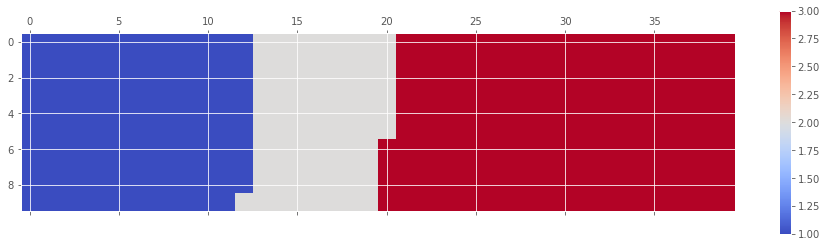

In [15]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

plt.show()

Step 6. Prettify the chart.

([], [])

<Figure size 432x288 with 0 Axes>

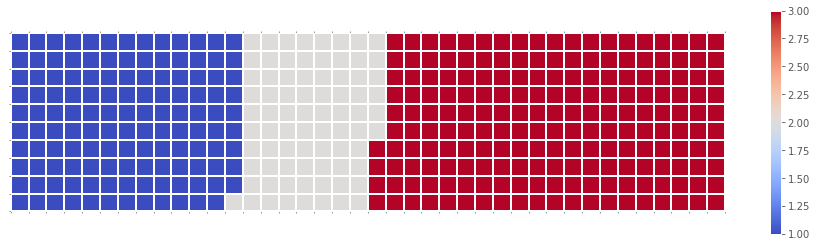

In [16]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])


Step 7. Create a legend and add it to chart.

<Figure size 432x288 with 0 Axes>

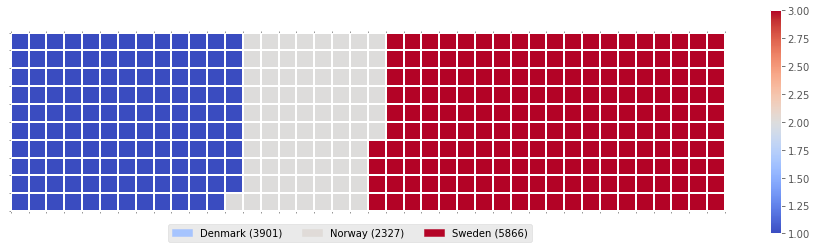

In [17]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i])+ ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

In [18]:
for i, category in enumerate(df_dsn.index.values):
    print(i)
    print(category)

0
Denmark
1
Norway
2
Sweden


In [19]:
def create_waffle_chart(width, height, categories, values):
    
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]
    
    total_num_tiles = width * height 
    
    tiles_per_category = [ round(proportion * total_num_tiles) for proportion in category_proportions]
    
    #print(tiles_per_category)
    
    waffle_chart = np.zeros((height, width))
    
    category_index = 0
    tile_index = 0
    
    for col in range(width):
        for row in range(height):
            tile_index += 1
            
            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1
                
            waffle_chart[row, col] = category_index
            
    #print(waffle_chart)
    
    fig = plt.figure()
    
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()
    
    ax = plt.gca()
    
    ax.set_xticks(np.arange(-.5, width, 1), minor=True)
    ax.set_yticks(np.arange(-.5, height, 1), minor=True)
    
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    
    plt.xticks([])
    plt.yticks([])
    
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]
    legend_handles = []
    
    for i, category in enumerate(categories):
        label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
        
        color_val = colormap(float(values_cumsum[i]/total_values))
        legend_handles.append(mpatches.Patch(color = color_val, label = label_str))
        
    plt.legend(handles = legend_handles, loc = 'lower center', ncol = len(categories), bbox_to_anchor=(0., -0.2, 0.95, .1))
    
    plt.show()

<Figure size 432x288 with 0 Axes>

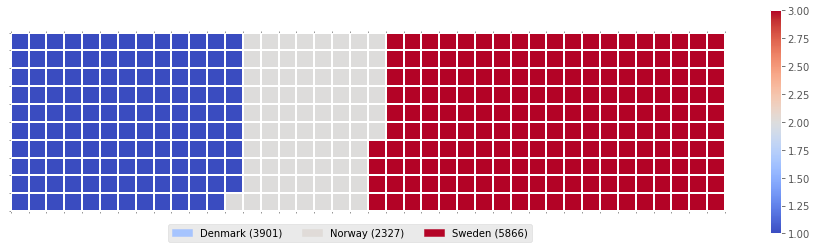

In [20]:
width = 40
height = 10

values = df_dsn['Total']
categories = df_dsn.index.values

create_waffle_chart(width, height, categories, values)

## Word Clouds 

First, let's install the package.

In [22]:
!conda install -c conda-forge wordcloud

from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Wordcloud is installed and imported!


In [29]:
import urllib.request
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt"
filename = 'alice_novel.txt'
urllib.request.urlretrieve(url, filename)

alice_novel = open('alice_novel.txt', 'r').read()
print(alice_novel)

ï»¿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pict

In [30]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [31]:
alice_wc = WordCloud(background_color = 'white',
                    max_words = 2000,
                    stopwords=stopwords)

alice_wc.generate(alice_novel)

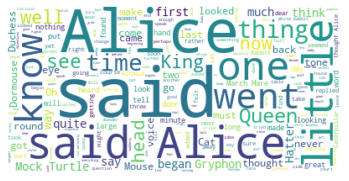

In [32]:
plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

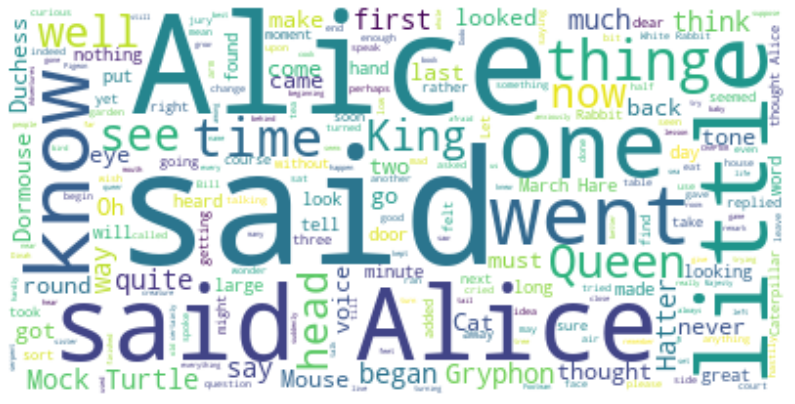

In [33]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Much better! However, said isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

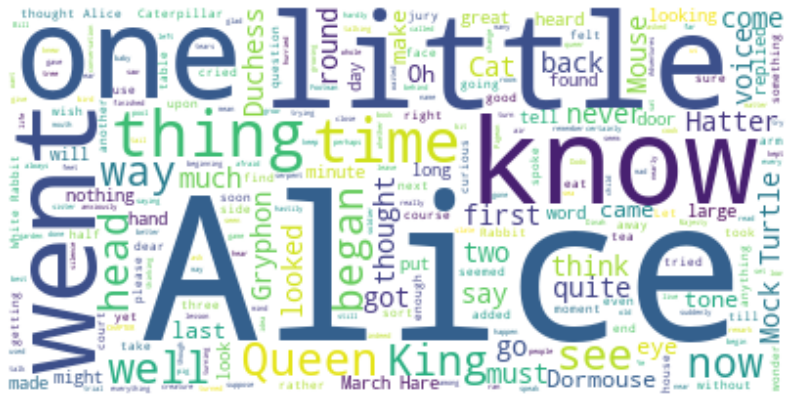

In [34]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [50]:
import urllib.request

urllib.request.urlretrieve("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png", "alice_mask.png")

alice_mask = np.array(Image.open('alice_mask.png'))
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

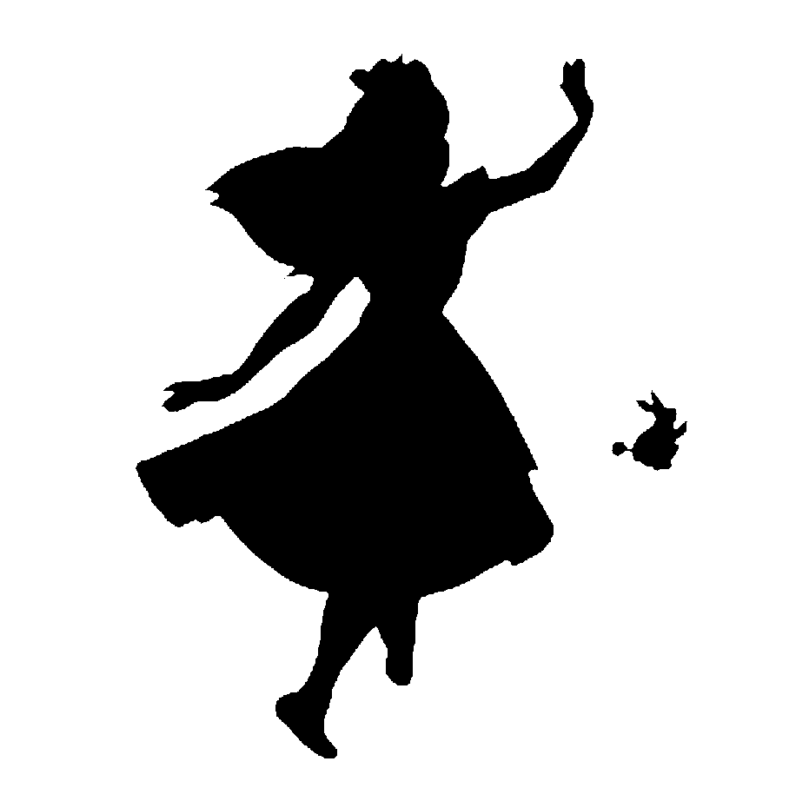

In [51]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Shaping the word cloud according to the mask is straightforward using word_cloud package. For simplicity, we will continue using the first 2000 words in the novel.

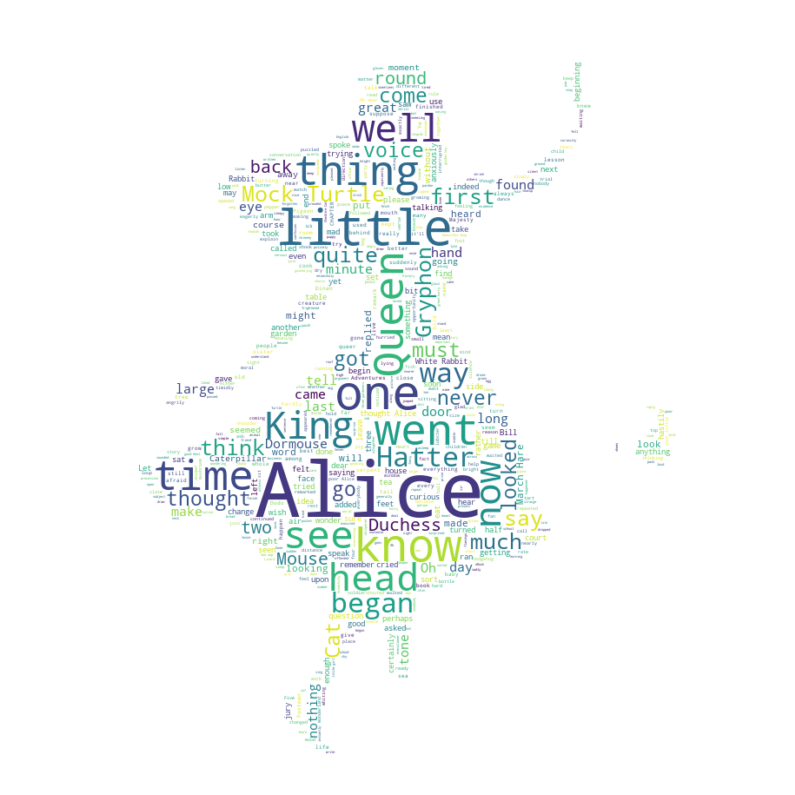

In [52]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Let's generate sample text data from our immigration dataset, say text data of 90 words.

total immigration from 1980 to 2013?

In [53]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.

In [68]:
max_words = 90
word_string = ''

for country in df_can.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total'] / float(total_immigration) * max_words)
        print(repeat_num_times)
        word_string = word_string + ((country + ' ') * repeat_num_times)
        
word_string

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
9
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
9
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
7
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

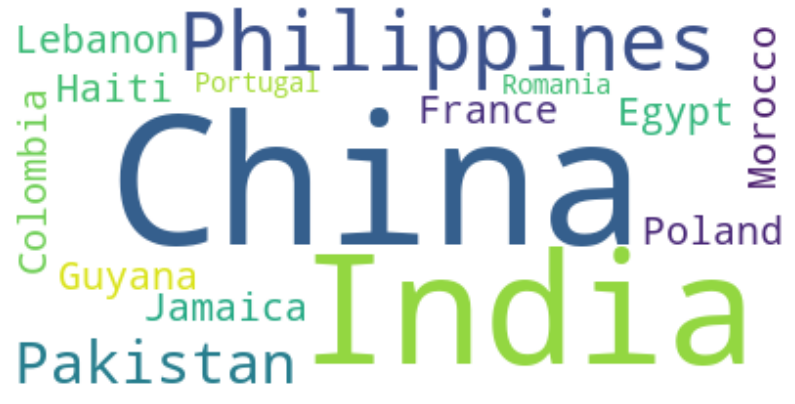

In [70]:
wordcloud = WordCloud(background_color= 'white').generate(word_string)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Regression plots

In [71]:
!pip install seaborn

In [72]:
import seaborn as sns

Create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.

In [80]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(float, df_tot.index)

df_tot.index

df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()


,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


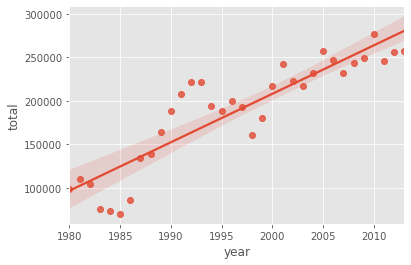

In [94]:
ax = sns.regplot(x='year', y='total', data=df_tot)

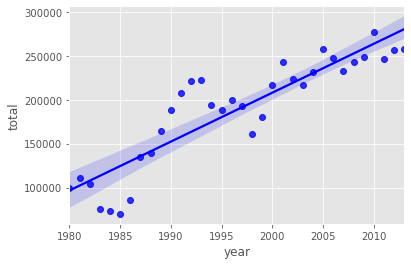

In [93]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='blue')

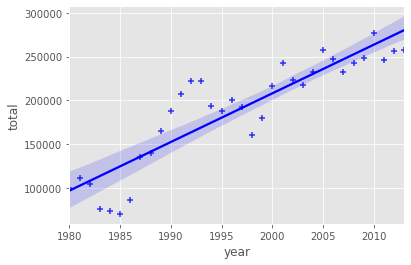

In [92]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='blue', marker='+')

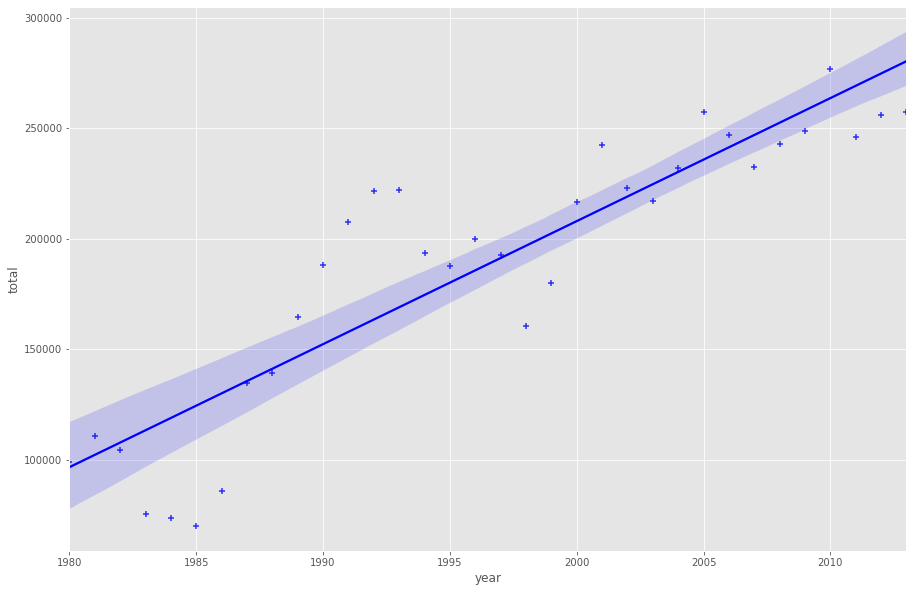

In [91]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='blue', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

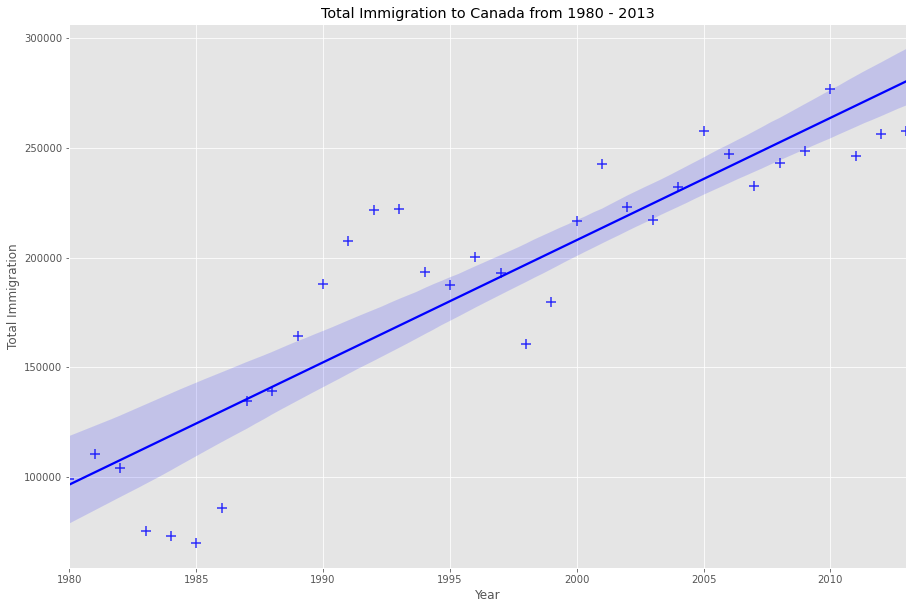

In [97]:
#And let's increase the size of markers so they match the new size of the figure, and add a title and x- and y-labels.

plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='blue', marker='+', scatter_kws={'s':100})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title("Total Immigration to Canada from 1980 - 2013")

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

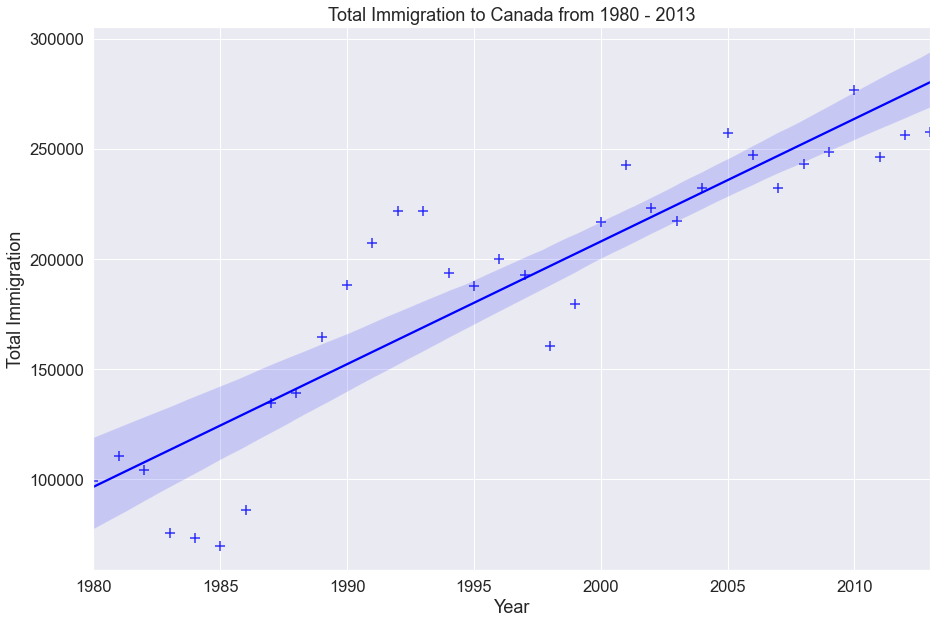

In [98]:
# increase the font size of the tickmark labels, the title, and the x- and y-labels so they don't feel left out!

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
ax = sns.regplot(x='year', y='total', data=df_tot, color='blue', marker='+', scatter_kws={'s':100})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title("Total Immigration to Canada from 1980 - 2013")

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

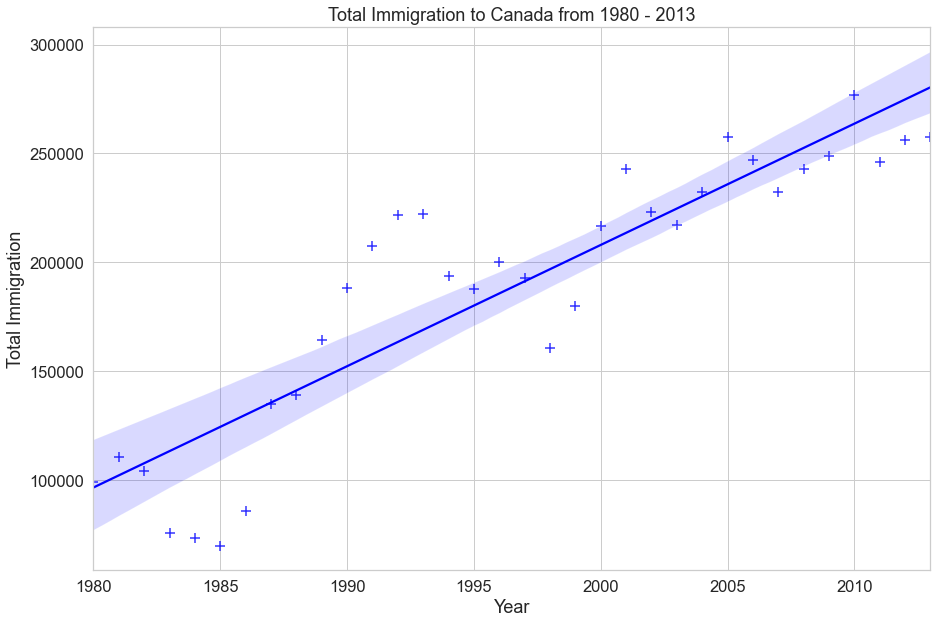

In [99]:
# Or to a white background with gridlines.

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total', data=df_tot, color='blue', marker='+', scatter_kws={'s':100})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title("Total Immigration to Canada from 1980 - 2013")

In [112]:
df_dsn = pd.DataFrame(df_can.loc[['Denmark', 'Norway', 'Sweden'], years].sum(axis=0))

df_dsn.index = map(float, df_dsn.index)
df_dsn.index
df_dsn.reset_index(inplace=True)
df_dsn.columns = ['year', 'total']
df_dsn.head()

,year,total
0,1980.0,669
1,1981.0,678
2,1982.0,627
3,1983.0,333
4,1984.0,252


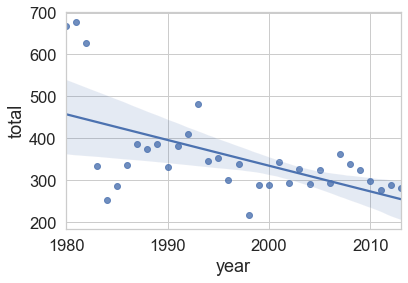

In [115]:
ax = sns.regplot(x='year', y = 'total', data=df_dsn)

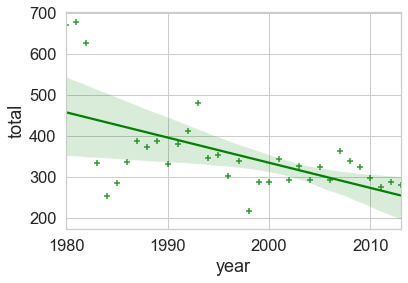

In [116]:
ax = sns.regplot(x='year', y = 'total', data=df_dsn, color='green', marker = '+')

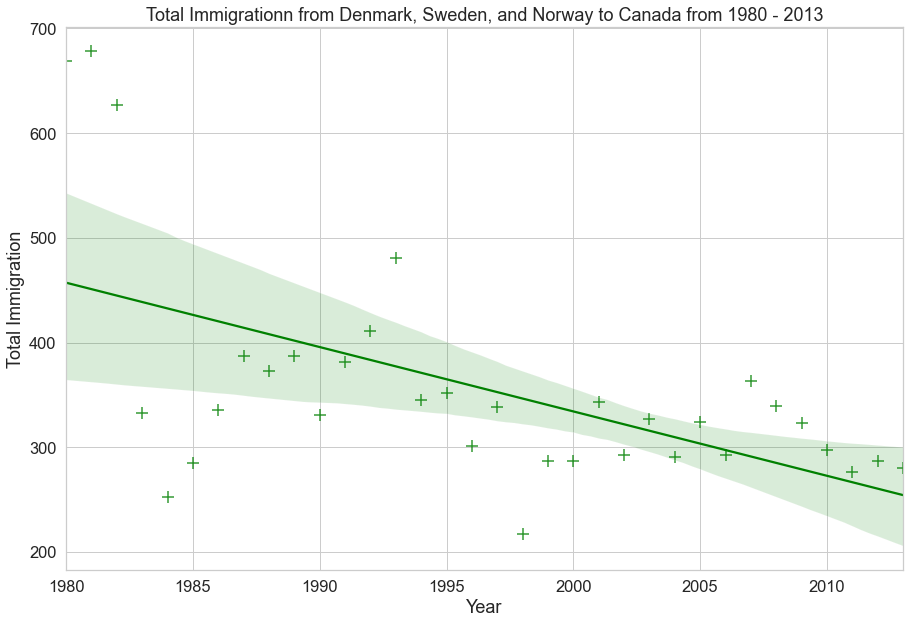

In [119]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y = 'total', data=df_dsn, color='green', marker = '+', scatter_kws={'s':150})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

plt.show()